<a href="https://www.kaggle.com/code/priyanshusethi/spaceship-competition-blast-ai-capstone-project?scriptVersionId=134585986" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Importing Libraries and loading data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

In [3]:
train_df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

# Numerical Data Analysis

In [4]:
# how the data looks like?
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train_df.shape

(8693, 14)

In [7]:
#checking for null values
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [9]:
# checking for bias
train_df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [10]:
train_df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [11]:
train_df['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [12]:
train_df['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [13]:
train_df['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [14]:
# checking for correlation among the features
train_df.corr(numeric_only = True)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [15]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Data Preprocessing

In [16]:
# Filling null values
# Homeplanet is a categorical feature and there can be two approaches to fill NaN values. 
# Either create a new Missing category or Fill in the most frequent value.
# Let's go ahead with the new category approach
train_df['HomePlanet'].fillna('Missing', inplace=True)
test_df['HomePlanet'].fillna('Missing', inplace=True)

In [17]:
# Let's fill the NaN values in CryoSleep with the most frequent occurence
train_df['CryoSleep'].fillna('False', inplace=True)
test_df['CryoSleep'].fillna('False', inplace=True)


In [18]:
# We will drop the Cabin feature for this study
train_df = train_df.drop("Cabin",axis=1)
test_df = test_df.drop("Cabin",axis=1)

In [19]:
#Let's fill the NaN destination as missing
train_df['Destination'].fillna('Missing', inplace=True)
test_df['Destination'].fillna('Missing', inplace=True)

In [20]:
# Let's fill the age column with the mean age
mean_age = train_df['Age'].mean()
train_df['Age'].fillna(mean_age, inplace=True)
test_df['Age'].fillna(mean_age, inplace=True)

In [21]:
# A large majority of the people are not a VIP so let's replace NaN values with FALSE
train_df['VIP'].fillna('False', inplace=True)
test_df['VIP'].fillna('False', inplace=True)

In [22]:
# Let's use mean imputation to fill all the bill features for different amenities
mean_vrdeck = train_df['VRDeck'].mean()
mean_roomservice = train_df['RoomService'].mean()
mean_foodcourt = train_df['FoodCourt'].mean()
mean_shoppingmall = train_df['ShoppingMall'].mean()
mean_spa = train_df['Spa'].mean()

In [23]:
train_df['RoomService'].fillna(mean_roomservice, inplace=True)
test_df['RoomService'].fillna(mean_roomservice, inplace=True)

train_df['FoodCourt'].fillna(mean_foodcourt, inplace=True)
test_df['FoodCourt'].fillna(mean_foodcourt, inplace=True)

train_df['ShoppingMall'].fillna(mean_shoppingmall, inplace=True)
test_df['ShoppingMall'].fillna(mean_shoppingmall, inplace=True)

train_df['Spa'].fillna(mean_spa, inplace=True)
test_df['Spa'].fillna(mean_spa, inplace=True)

train_df['VRDeck'].fillna(mean_vrdeck, inplace=True)
test_df['VRDeck'].fillna(mean_vrdeck, inplace=True)

In [24]:
# Let's drop the Name column for this study
train_df = train_df.drop("Name",axis=1)
test_df = test_df.drop("Name",axis=1)

In [25]:
train_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [26]:
test_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [27]:
# No Null values anymore YAYY!

In [28]:
# The Features RoomService, FoodCourt, ShoppingMall, Spa,VRDeck increase the cardinality.
# Considering the similar nature of these features , we will combine them to avoid multi cardinality
train_df["spending"]=train_df["FoodCourt"]+train_df["ShoppingMall"]+train_df["Spa"]+train_df["RoomService"]+train_df["VRDeck"]
test_df["spending"]=test_df["FoodCourt"]+test_df["ShoppingMall"]+test_df["Spa"]+test_df["RoomService"]+test_df["VRDeck"]
   
             
 

In [29]:
train_df = train_df.drop(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"],axis=1)
test_df = test_df.drop(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"],axis=1)

# Visual data analysis

<Axes: >

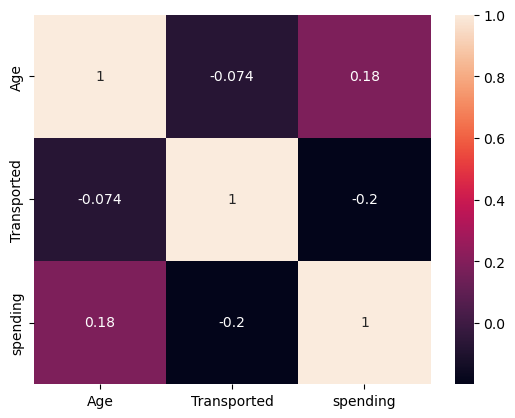

In [30]:
sns.heatmap(train_df.corr(numeric_only = True), annot = True)

In [31]:
train_df.sample(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,spending
173,0196_01,Mars,False,PSO J318.5-22,25.0,False,False,1778.0
2084,2234_02,Mars,True,55 Cancri e,20.0,False,True,0.0
213,0223_01,Earth,False,TRAPPIST-1e,21.0,False,False,676.0
6996,7438_01,Earth,False,55 Cancri e,42.0,False,True,718.0
2885,3120_01,Mars,True,TRAPPIST-1e,25.0,False,True,0.0


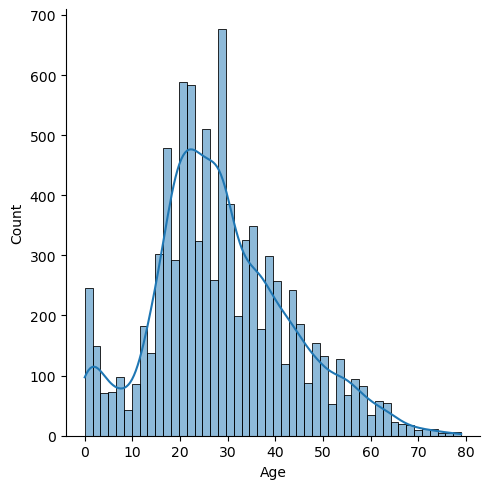

In [32]:
sns.displot(train_df['Age'] , kde=True)

In [33]:
ex_level = train_df['HomePlanet'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values, 
                title = 'Home Planet')
fig.show()

In [34]:
ex_level = train_df['Destination'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values, 
                title = 'Destination')
fig.show()

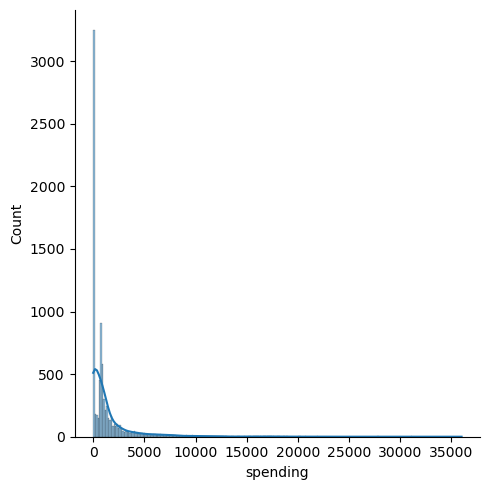

In [35]:
sns.displot(train_df['spending'] , kde=True)

# Checking Outliers

In [36]:
# Using the Z-score method to remove outliers from spending feature
print("Mean value of Spending",train_df['spending'].mean())
print("Std value of Spending",train_df['spending'].std())
print("Min value of Spending",train_df['spending'].min())
print("Max value of Spending",train_df['spending'].max())

Mean value of Spending 1472.4875591010086
Std value of Spending 2799.9157093444164
Min value of Spending 0.0
Max value of Spending 35987.0


In [37]:
print("Highest allowed",train_df['spending'].mean() + 3*train_df['spending'].std())
print("Lowest allowed",train_df['spending'].mean() - 3*train_df['spending'].std())

Highest allowed 9872.23468713426
Lowest allowed -6927.259568932242


In [38]:
train_df[(train_df['spending'] < -6927) & (train_df['spending'] > 9872)]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,spending


In [39]:
# There are no outliers in accordance with the z-score method

# Encoding Categorical Data

In [40]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,spending
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,False,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,True,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,False,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,False,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,True,1091.0


In [41]:
x_train = train_df.drop("Transported",axis=1)
y_train = train_df["Transported"]

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [43]:
y_train = le.transform(y_train)

In [44]:
x_train['CryoSleep'].replace({'False': 0, 'True': 1}, inplace = True)
test_df['CryoSleep'].replace({'False': 0, 'True': 1}, inplace = True)

In [45]:
test_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,spending
0,0013_01,Earth,True,TRAPPIST-1e,27.00000,False,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.00000,False,2832.0
2,0019_01,Europa,True,55 Cancri e,31.00000,False,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.00000,False,7418.0
4,0023_01,Earth,False,TRAPPIST-1e,20.00000,False,645.0
...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.00000,False,0.0
4273,9269_01,Earth,False,TRAPPIST-1e,42.00000,False,1018.0
4274,9271_01,Mars,True,55 Cancri e,28.82793,False,0.0
4275,9273_01,Europa,False,Missing,28.82793,False,3203.0
